# <b>Data Preparation</b>

## Johns Hopkins GITHUB data
This data contains more detailed information for African countries compared to smartable.ai data.<br>
This motivates our choice.

In [1]:
import numpy as np
import pandas
import geopandas as gpd

import io
import requests

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

import seaborn
seaborn.set(style='whitegrid')

Loading BokehJS ...

## <b>Getting raw data</b>

In [2]:
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/\
csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'

In [3]:
def get_data(name):
    '''Get the data from github website and creates a pandas.DataFrame out of it.
    Parameters:
    ----------
            name (str): a name in csv_list
    Returns:
    -------
            pandas.DataFrame'''

    url = base_url + name + '.csv'
    content = requests.get(url).content
    df = pandas.read_csv(io.StringIO(content.decode('utf-8')),
                                skipinitialspace=True)
    return df

df_raw_all = get_data('confirmed_global')
df_raw_reco = get_data('recovered_global')
df_raw_deaths = get_data( 'deaths_global')

# sep='delimiter', to deal with pandas.parser.CParserError: Error tokenizing data. error
# engine='python' to avoid warning: ParserWarning: 
#Falling back to the 'python' engine because the 'c' engine does not support regex separators

### <b>Checkpoint 0 </b>

`df_raw_all`, `df_raw_reco`  and `df_raw_deaths` dataframe created.<br>
They are the raw data of confirmed cases, recovered cases and death cases obtained from Johns Hopkins github.

## <b>Confirmed Cases</b>

In [4]:
# #data path for all countries time series
# data_path_ts = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# df_raw_all = pandas.read_csv(data_path_ts, skipinitialspace=True)

In [5]:
df_raw_all.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,45174,45384,45600,45723,45844,46116,46274,46717,46980,46718
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361


In [6]:
df_raw_all.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
266,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,75007,76727,78493,80429,81890,83585,85647,88004,90192,92708
267,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
268,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2114,2124,2137,2148,2160,2177,2191,2197,2217,2239
269,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,17466,17535,17553,17569,17589,17608,17647,17665,17700,17730
270,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,9398,9508,9623,9714,9822,9822,9950,10129,10129,10424


In [7]:
df_raw_all.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/24/20', '11/25/20', '11/26/20', '11/27/20', '11/28/20', '11/29/20',
       '11/30/20', '12/1/20', '12/2/20', '12/3/20'],
      dtype='object', length=317)

In [8]:
time_index = df_raw_all.columns[4:]

df_time = pandas.DataFrame({'date': time_index})
df_time.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [9]:
type(df_time['date'])

pandas.core.series.Series

In [10]:
# converting date format into datetime ISO 8601 international format
time_series = pandas.to_datetime(df_time['date'], format='%m/%d/%y')
time_series

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
312   2020-11-29
313   2020-11-30
314   2020-12-01
315   2020-12-02
316   2020-12-03
Name: date, Length: 317, dtype: datetime64[ns]

In [11]:
df_time_formated = pandas.DataFrame({'date': time_series})

In [12]:
df_time_formated.head()

,date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


### <b>Checkpoint 1</b>
a standard datetime DataFrame, `df_time_formated` , created

In [13]:
df_raw_all.columns[:4]

Index(['Province/State', 'Country/Region', 'Lat', 'Long'], dtype='object')

In [14]:
df_raw_all[df_raw_all['Country/Region']=='Angola']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361


In [15]:
df_raw_all['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [16]:
country_df = pandas.read_csv('../data/raw/countries.csv', sep=';', skipinitialspace=True)

In [17]:
country_df

,country,population
0,Angola,30.81
1,Botswana,2.26
2,Burundi,11.20
3,Comoros,0.84
4,Congo (Kinshasa),84.07
5,Eritrea,3.22
6,Eswatini,1.14
7,Ethiopia,109.20
8,Kenya,51.39
9,Lesotho,2.11


In [18]:
country_list = list(country_df['country'])

In [19]:
country_list

['Angola',
 'Botswana',
 'Burundi',
 'Comoros',
 'Congo (Kinshasa)',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Kenya',
 'Lesotho',
 'Madagascar',
 'Malawi',
 'Mauritius',
 'Mozambique',
 'Namibia',
 'Rwanda',
 'Seychelles',
 'Somalia',
 'South Africa',
 'Tanzania',
 'Uganda',
 'Zambia',
 'Zimbabwe',
 'China',
 'Singapore',
 'Korea, South',
 'Taiwan',
 'Germany']

### <b>We added Germany to our country list since it can be useful for comparison</b>

In [20]:
#creating a dataframe for our specified countries only
df_raw = df_time_formated.copy()
for country in country_list:
    df_raw[country] = np.array(df_raw_all[df_raw_all['Country/Region']==country].iloc[:, 4::].sum(axis=0))

### <b>Checkpoint 2</b>
Created a raw timeseries DataFrame of confirmed cases, `df_raw`, from all the countries we are interested in

In [21]:
df_raw.head()

,date,Angola,Botswana,Burundi,Comoros,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,...,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Taiwan,Germany
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,548,0,1,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,643,1,1,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,920,3,2,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1406,3,2,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2075,4,3,0,0


In [22]:
df_raw.tail()

,date,Angola,Botswana,Burundi,Comoros,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,...,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Taiwan,Germany
312,2020-11-29,15103,10258,681,611,12702,577,6410,109534,83316,...,787702,509,20145,17608,9822,92814,58213,34201,0,1055691
313,2020-11-30,15139,10742,688,611,12772,577,6419,110074,83618,...,790004,509,20459,17647,9950,92902,58218,34652,0,1069912
314,2020-12-01,15251,10742,689,613,12859,577,6442,110554,84169,...,792299,509,21035,17665,10129,92993,58228,35163,0,1094678
315,2020-12-02,15319,10742,689,613,12987,577,6455,110984,85130,...,796472,509,21409,17700,10129,93113,58230,35703,0,1117953
316,2020-12-03,15361,11531,692,615,13132,594,6474,111579,86383,...,800872,509,21612,17730,10424,93221,58239,36332,0,1141544


In [23]:
print(df_raw['Comoros'].sum())
print(df_raw['Lesotho'].sum())
print(df_raw['Taiwan'].sum())

78639
201155
0


### <b>Comoros, Lesotho and Taiwan columns does not contains data so we will remove them from the study </b>

In [24]:
df_raw_2 = df_raw.copy()
df_raw_2 = df_raw_2.drop(['Comoros', 'Lesotho', 'Taiwan'] , axis=1)

In [25]:
df_raw_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              317 non-null    datetime64[ns]
 1   Angola            317 non-null    int64         
 2   Botswana          317 non-null    int64         
 3   Burundi           317 non-null    int64         
 4   Congo (Kinshasa)  317 non-null    int64         
 5   Eritrea           317 non-null    int64         
 6   Eswatini          317 non-null    int64         
 7   Ethiopia          317 non-null    int64         
 8   Kenya             317 non-null    int64         
 9   Madagascar        317 non-null    int64         
 10  Malawi            317 non-null    int64         
 11  Mauritius         317 non-null    int64         
 12  Mozambique        317 non-null    int64         
 13  Namibia           317 non-null    int64         
 14  Rwanda            317 non-

In [26]:
df_raw_2.info

<bound method DataFrame.info of           date  Angola  Botswana  Burundi  Congo (Kinshasa)  Eritrea  \
0   2020-01-22       0         0        0                 0        0   
1   2020-01-23       0         0        0                 0        0   
2   2020-01-24       0         0        0                 0        0   
3   2020-01-25       0         0        0                 0        0   
4   2020-01-26       0         0        0                 0        0   
..         ...     ...       ...      ...               ...      ...   
312 2020-11-29   15103     10258      681             12702      577   
313 2020-11-30   15139     10742      688             12772      577   
314 2020-12-01   15251     10742      689             12859      577   
315 2020-12-02   15319     10742      689             12987      577   
316 2020-12-03   15361     11531      692             13132      594   

     Eswatini  Ethiopia  Kenya  Madagascar  ...  Somalia  South Africa  \
0           0         0      

### <b>Checkpoint 3</b>
Created a timeseries DataFrame, `df_raw_2`, with `'Comoros', 'Lesotho', 'Taiwan'` removed due to reasons explained above. <br>

<AxesSubplot:xlabel='date'>

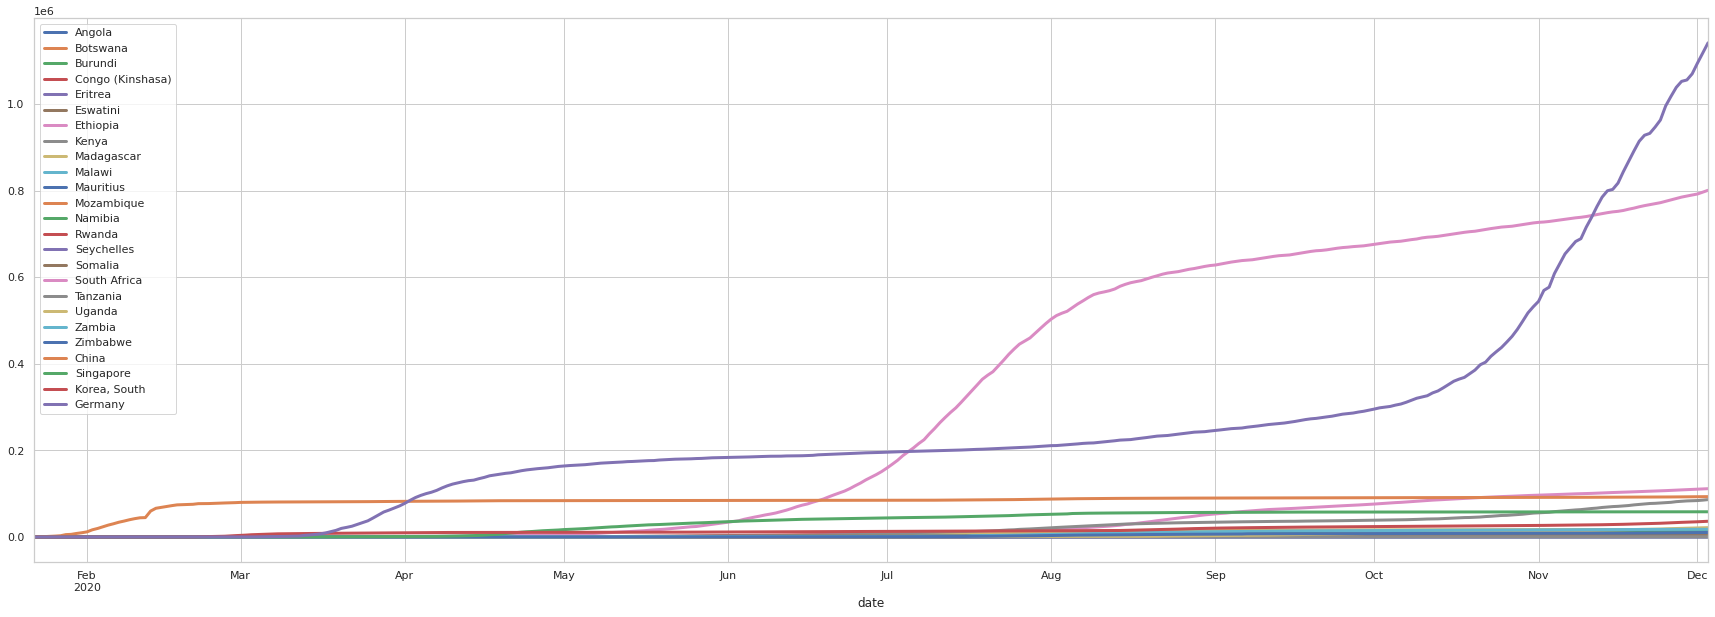

In [27]:
%matplotlib inline
df_raw_2.set_index('date').plot(figsize=(30,10),
                                linewidth=3)

<AxesSubplot:>

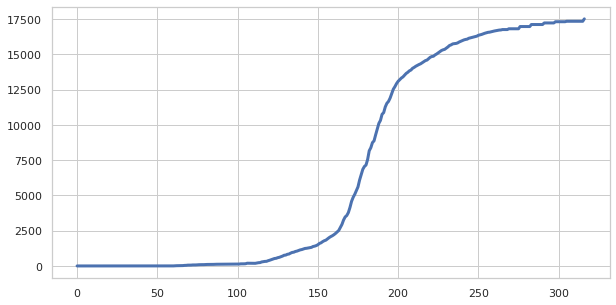

In [28]:
df_raw_2['Madagascar'].plot(figsize=(10,5),
                            linewidth=3)

In [29]:
country_list_2 = [country for country in country_list if country not in ['Comoros', 'Lesotho', 'Taiwan', 'China']]
country_list_2

['Angola',
 'Botswana',
 'Burundi',
 'Congo (Kinshasa)',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Kenya',
 'Madagascar',
 'Malawi',
 'Mauritius',
 'Mozambique',
 'Namibia',
 'Rwanda',
 'Seychelles',
 'Somalia',
 'South Africa',
 'Tanzania',
 'Uganda',
 'Zambia',
 'Zimbabwe',
 'Singapore',
 'Korea, South',
 'Germany']

<AxesSubplot:>

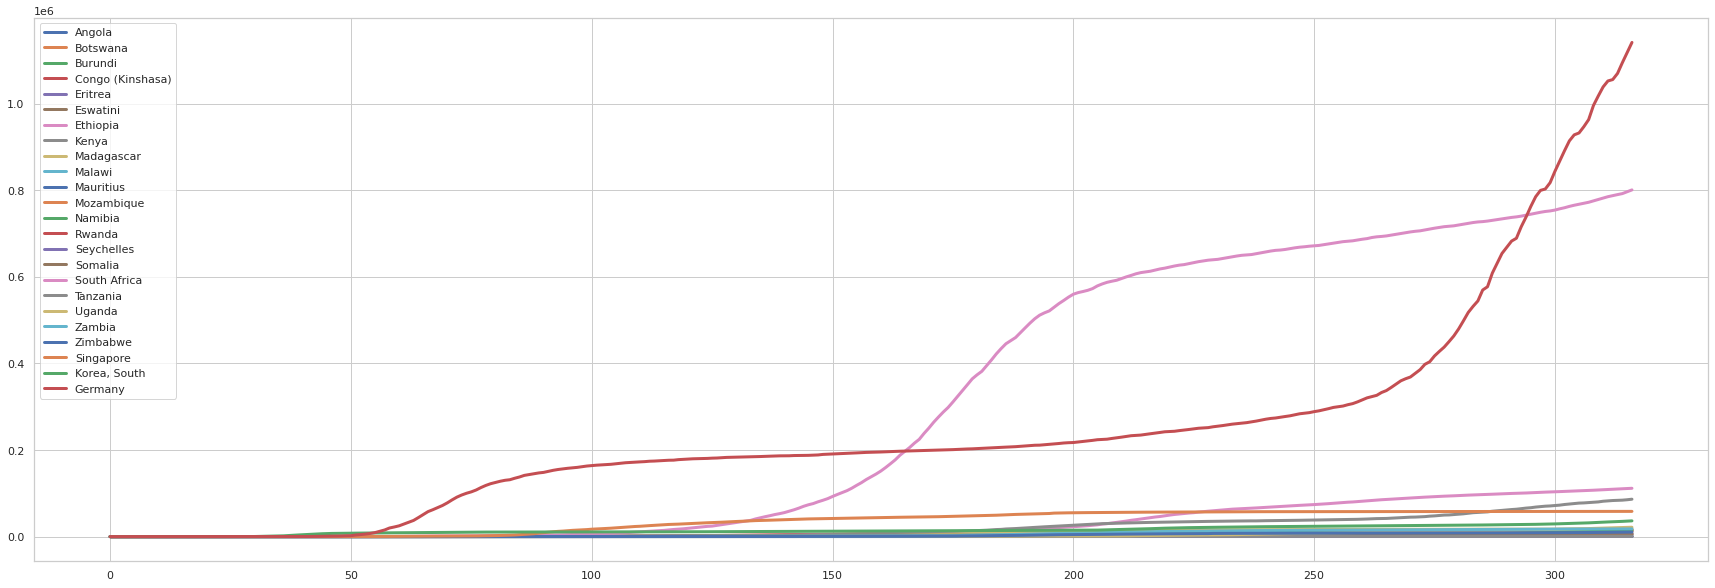

In [30]:
%matplotlib inline
df_raw_2[country_list_2].plot(figsize=(30,10),
                              linewidth=3)

In [31]:
country_africa_list = [country for country in country_list_2 if country not in ['China', 'Singapore', 'Korea, South']] 
country_africa_list

['Angola',
 'Botswana',
 'Burundi',
 'Congo (Kinshasa)',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Kenya',
 'Madagascar',
 'Malawi',
 'Mauritius',
 'Mozambique',
 'Namibia',
 'Rwanda',
 'Seychelles',
 'Somalia',
 'South Africa',
 'Tanzania',
 'Uganda',
 'Zambia',
 'Zimbabwe',
 'Germany']

<AxesSubplot:>

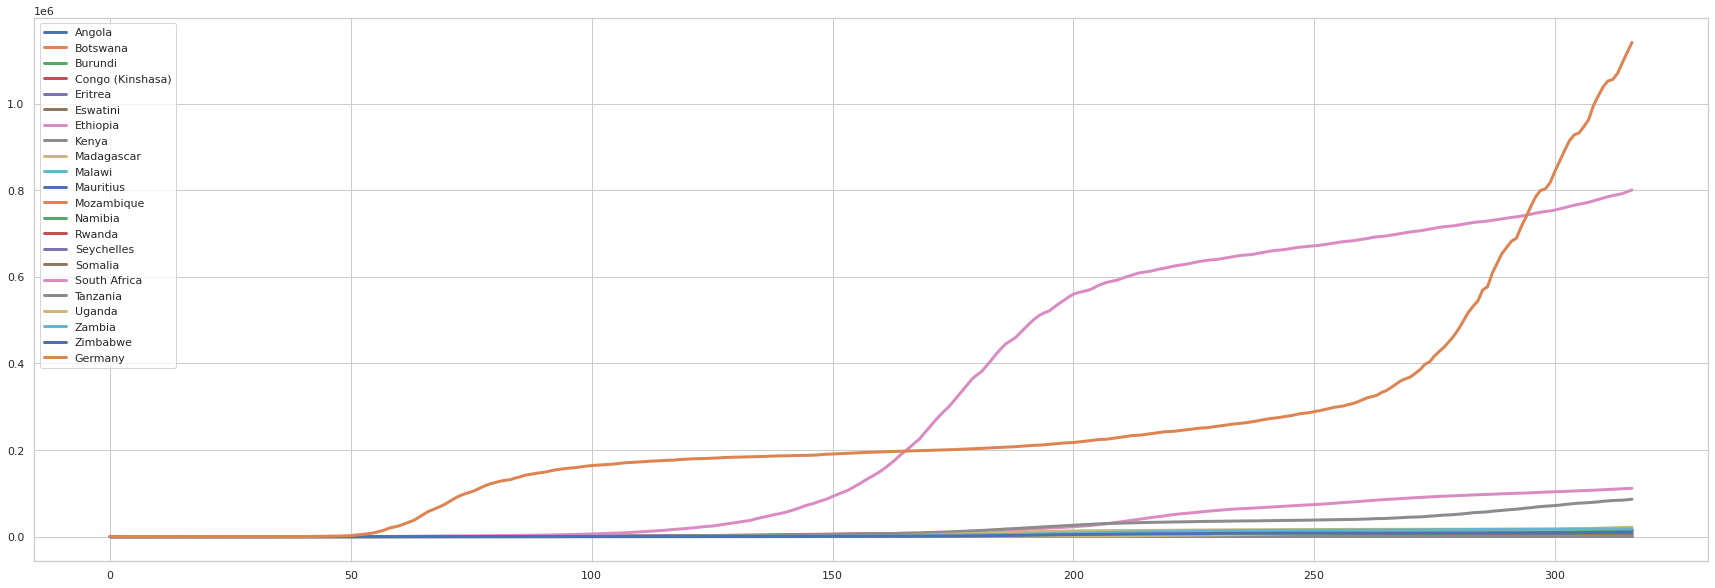

In [32]:
%matplotlib inline
df_raw[country_africa_list].plot(figsize=(30,10),
                                 linewidth=3)

In [33]:
# dropping south africa
country_africa2 = country_africa_list.copy()
country_africa2.remove('South Africa')

<AxesSubplot:>

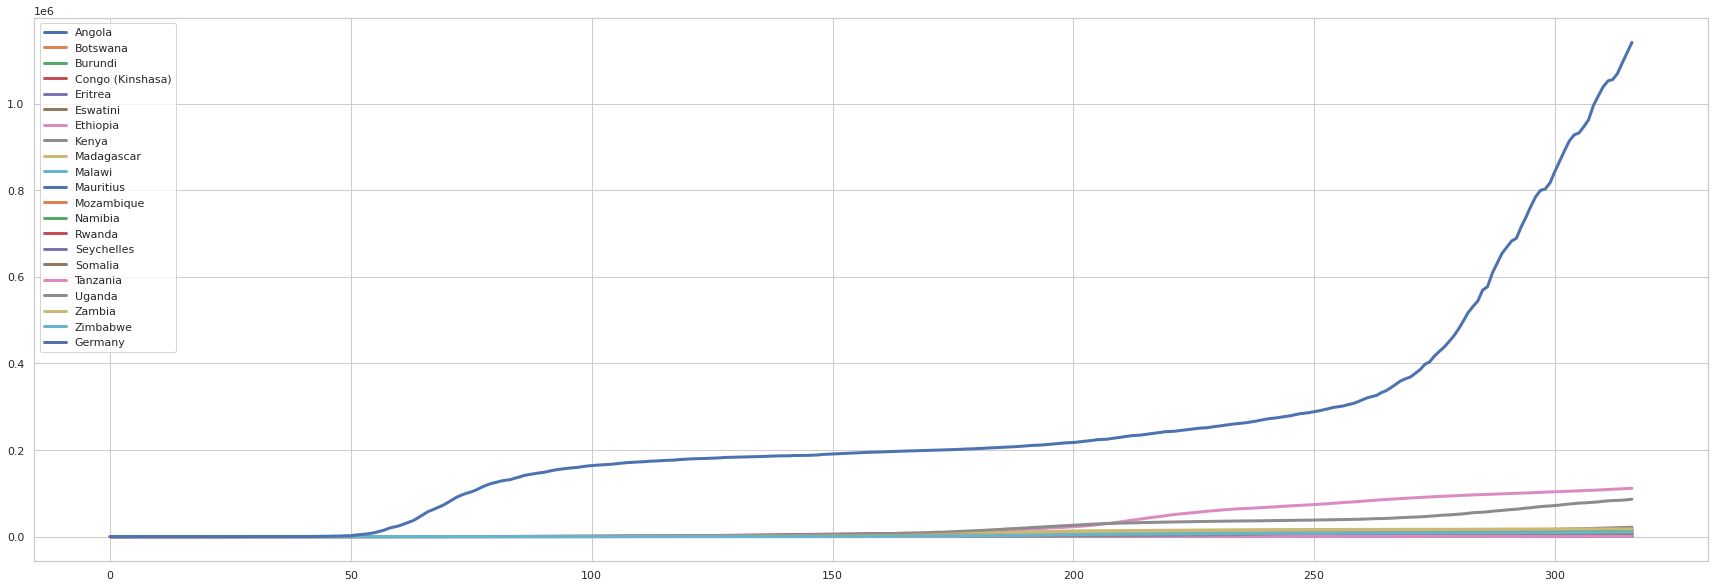

In [34]:
%matplotlib inline
df_raw[country_africa2].plot(figsize=(30,10),
                             linewidth=3)

### Saving the new raw data

In [35]:
df_raw_2.to_csv('../data/raw/raw_time_series.csv', index=False)

### Creating DataFrame containing population number

In [36]:
# creating a dictionary with countries as keys and population number in million as value
#  out of the country_df DataFrame
pop_dic = {country_df['country'][i]:country_df['population'][i] for i in range(country_df.shape[0])
          if country_df['country'][i] not in ['Comoros', 'Lesotho', 'Taiwan']}
pop_dic 

{'Angola': 30.81,
 'Botswana': 2.26,
 'Burundi': 11.2,
 'Congo (Kinshasa)': 84.07,
 'Eritrea': 3.22,
 'Eswatini': 1.14,
 'Ethiopia': 109.2,
 'Kenya': 51.39,
 'Madagascar': 26.26,
 'Malawi': 18.14,
 'Mauritius': 1.27,
 'Mozambique': 29.5,
 'Namibia': 2.45,
 'Rwanda': 12.3,
 'Seychelles': 0.1,
 'Somalia': 15.0,
 'South Africa': 57.78,
 'Tanzania': 56.32,
 'Uganda': 42.72,
 'Zambia': 17.35,
 'Zimbabwe': 14.4,
 'China': 1393.0,
 'Singapore': 5.54,
 'Korea, South': 51.64,
 'Germany': 83.02}

In [37]:
# we specify index=[0] since dictionary values are not lists
new_row = pandas.DataFrame(pop_dic, index=[0])

In [38]:
new_row

,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
0,30.81,2.26,11.2,84.07,3.22,1.14,109.2,51.39,26.26,18.14,...,15.0,57.78,56.32,42.72,17.35,14.4,1393.0,5.54,51.64,83.02


In [39]:
new_row['date'] = [None]

In [40]:
new_row

,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,...,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany,date
0,30.81,2.26,11.2,84.07,3.22,1.14,109.2,51.39,26.26,18.14,...,57.78,56.32,42.72,17.35,14.4,1393.0,5.54,51.64,83.02,None


In [41]:
reodered_columns = ['date']
reodered_columns.extend(list(new_row.columns.values))
reodered_columns = reodered_columns[:-1]

In [42]:
reodered_columns

['date',
 'Angola',
 'Botswana',
 'Burundi',
 'Congo (Kinshasa)',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Kenya',
 'Madagascar',
 'Malawi',
 'Mauritius',
 'Mozambique',
 'Namibia',
 'Rwanda',
 'Seychelles',
 'Somalia',
 'South Africa',
 'Tanzania',
 'Uganda',
 'Zambia',
 'Zimbabwe',
 'China',
 'Singapore',
 'Korea, South',
 'Germany']

In [43]:
new_row = new_row[reodered_columns]

In [44]:
new_row

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
0,None,30.81,2.26,11.2,84.07,3.22,1.14,109.2,51.39,26.26,...,15.0,57.78,56.32,42.72,17.35,14.4,1393.0,5.54,51.64,83.02


In [45]:
df_with_pop = pandas.concat([new_row, df_raw_2]).reset_index(drop=True)

df_with_pop.head()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
0,NaT,30.81,2.26,11.2,84.07,3.22,1.14,109.2,51.39,26.26,...,15.0,57.78,56.32,42.72,17.35,14.4,1393.0,5.54,51.64,83.02
1,2020-01-22,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,548.0,0.00,1.00,0.00
2,2020-01-23,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,643.0,1.00,1.00,0.00
3,2020-01-24,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,920.0,3.00,2.00,0.00
4,2020-01-25,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,1406.0,3.00,2.00,0.00


### Saving confirmed cases data 

In [46]:
df_with_pop.to_csv('../data/processed/time_series_with_pop.csv', index=False)

In [47]:
df_raw_2.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
312,2020-11-29,15103,10258,681,12702,577,6410,109534,83316,17341,...,4451,787702,509,20145,17608,9822,92814,58213,34201,1055691
313,2020-11-30,15139,10742,688,12772,577,6419,110074,83618,17341,...,4451,790004,509,20459,17647,9950,92902,58218,34652,1069912
314,2020-12-01,15251,10742,689,12859,577,6442,110554,84169,17341,...,4451,792299,509,21035,17665,10129,92993,58228,35163,1094678
315,2020-12-02,15319,10742,689,12987,577,6455,110984,85130,17341,...,4525,796472,509,21409,17700,10129,93113,58230,35703,1117953
316,2020-12-03,15361,11531,692,13132,594,6474,111579,86383,17513,...,4525,800872,509,21612,17730,10424,93221,58239,36332,1141544


In [48]:
df_raw_2.to_csv('../data/processed/time_series_confirmed.csv', index=False)

### Saving the new (with 'Comoros', 'Lesotho', 'Taiwan' removed) population DataFrame in csv

In [49]:
new_row_2 = new_row.drop('date', axis=1)

In [50]:
new_row_2

,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,Malawi,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
0,30.81,2.26,11.2,84.07,3.22,1.14,109.2,51.39,26.26,18.14,...,15.0,57.78,56.32,42.72,17.35,14.4,1393.0,5.54,51.64,83.02


In [51]:
new_row_2 = new_row_2.T.reset_index()

In [52]:
new_row_2.head()

,index,0
0,Angola,30.81
1,Botswana,2.26
2,Burundi,11.20
3,Congo (Kinshasa),84.07
4,Eritrea,3.22


In [53]:
new_row_2 = new_row_2.rename({'index': 'country', 0: 'population'}, axis=1)
new_row_2.head()

,country,population
0,Angola,30.81
1,Botswana,2.26
2,Burundi,11.20
3,Congo (Kinshasa),84.07
4,Eritrea,3.22


In [54]:
new_row_2.to_csv('../data/processed/countries_pertinent.csv', index=False)

### <b>Checkpoint 4</b>
`countries_pertinent.csv` and `time_series_with_pop.csv` saved 

## <b>Resolved Cases</b>

##### We need:
     1. recovered cases
     2. death cases
     3. active cases

In [55]:
# #data path for all countries time series
# data_path_recovered = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
# data_path_deaths = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
# df_raw_reco = pandas.read_csv(data_path_recovered, skipinitialspace=True)
# df_raw_deaths = pandas.read_csv(data_path_deaths, skipinitialspace=True)

In [56]:
df_raw_reco.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36122,36145,36232,36295,36709,36731,36788,36907,37026,37218
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,16666,17031,17352,17755,18152,18481,18849,19384,19912,20484
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,50070,50712,51334,51946,52568,53204,53809,54405,54990,55538
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5503,5542,5649,5710,5710,5794,5873,5940,5988,6066
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7444,7517,7617,7697,7763,7763,7851,7932,8139,8244


In [57]:
df_raw_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1715,1728,1737,1740,1752,1774,1795,1797,1822,1841
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,735,743,753,771,787,798,810,822,839,852
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2309,2329,2352,2372,2393,2410,2431,2447,2464,2480
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,76,77
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,338,340,341,342,345,346,348,350,351,352


In [58]:
#creating a dataframe for our specified countries only
df_reco = df_time_formated.copy()
df_deaths = df_time_formated.copy()
for country in country_list:
    df_reco[country] = np.array(df_raw_reco[df_raw_reco['Country/Region']==country].iloc[:, 4::].sum(axis=0))
    df_deaths[country] = np.array(df_raw_deaths[df_raw_deaths['Country/Region']==country].iloc[:, 4::].sum(axis=0))

In [59]:
df_reco.tail()

,date,Angola,Botswana,Burundi,Comoros,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,...,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Taiwan,Germany
312,2020-11-29,7763,7717,575,586,11585,498,5996,69315,54975,...,730633,183,8989,16983,8472,86998,58124,27653,0,730797
313,2020-11-30,7851,7912,575,586,11585,498,6006,73808,55344,...,731242,183,8989,16998,8482,87017,58134,27885,0,749219
314,2020-12-01,7932,7912,575,586,11663,498,6017,74917,55610,...,732531,183,9044,17059,8643,87051,58139,28065,0,769380
315,2020-12-02,8139,7912,575,586,11694,498,6032,76067,56464,...,734305,183,9044,17086,8643,87101,58144,28352,0,789564
316,2020-12-03,8244,8978,575,590,11753,498,6044,77385,56464,...,739367,183,9110,17102,8754,87147,58145,28611,0,811091


In [60]:
df_deaths.tail()

,date,Angola,Botswana,Burundi,Comoros,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,...,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Taiwan,Germany
312,2020-11-29,346,31,1,7,333,0,121,1700,1452,...,21477,21,201,357,275,4743,29,526,0,16306
313,2020-11-30,348,34,1,7,333,0,122,1706,1469,...,21535,21,205,357,276,4743,29,526,0,16694
314,2020-12-01,350,34,1,7,335,0,122,1709,1474,...,21644,21,205,357,277,4743,29,526,0,17177
315,2020-12-02,351,34,1,7,336,0,122,1715,1484,...,21709,21,206,357,277,4744,29,529,0,17659
316,2020-12-03,352,34,1,7,337,0,122,1724,1500,...,21803,21,206,357,280,4745,29,536,0,18097


### <b>Comoros, Lesotho and Taiwan columns does not contains data so we will remove them from the study </b>

In [61]:
df_reco = df_reco.drop(['Comoros', 'Lesotho', 'Taiwan'] , axis=1)
df_deaths = df_deaths.drop(['Comoros', 'Lesotho', 'Taiwan'] , axis=1)

In [62]:
df_reco.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
312,2020-11-29,7763,7717,575,11585,498,5996,69315,54975,16657,...,3417,730633,183,8989,16983,8472,86998,58124,27653,730797
313,2020-11-30,7851,7912,575,11585,498,6006,73808,55344,16657,...,3417,731242,183,8989,16998,8482,87017,58134,27885,749219
314,2020-12-01,7932,7912,575,11663,498,6017,74917,55610,16657,...,3417,732531,183,9044,17059,8643,87051,58139,28065,769380
315,2020-12-02,8139,7912,575,11694,498,6032,76067,56464,16657,...,3480,734305,183,9044,17086,8643,87101,58144,28352,789564
316,2020-12-03,8244,8978,575,11753,498,6044,77385,56464,16657,...,3480,739367,183,9110,17102,8754,87147,58145,28611,811091


In [63]:
df_deaths.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
312,2020-11-29,346,31,1,333,0,121,1700,1452,251,...,113,21477,21,201,357,275,4743,29,526,16306
313,2020-11-30,348,34,1,333,0,122,1706,1469,251,...,113,21535,21,205,357,276,4743,29,526,16694
314,2020-12-01,350,34,1,335,0,122,1709,1474,251,...,113,21644,21,205,357,277,4743,29,526,17177
315,2020-12-02,351,34,1,336,0,122,1715,1484,251,...,121,21709,21,206,357,277,4744,29,529,17659
316,2020-12-03,352,34,1,337,0,122,1724,1500,255,...,121,21803,21,206,357,280,4745,29,536,18097


#### Computing active cases

In [64]:
df_active = df_time_formated.copy()
country_list_3 = list(df_reco.columns.values)
country_list_3.remove('date')
for country in country_list_3:
    df_active[country] = df_raw_2[country] - df_reco[country] - df_deaths[country] 

In [65]:
df_active.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
312,2020-11-29,6994,2510,105,784,79,293,38519,26889,433,...,921,35592,305,10955,268,1075,1073,60,6022,308588
313,2020-11-30,6940,2796,112,854,79,291,34560,26805,433,...,921,37227,305,11265,292,1192,1142,55,6241,303999
314,2020-12-01,6969,2796,113,861,79,303,33928,27085,433,...,921,38124,305,11786,249,1209,1199,60,6572,308121
315,2020-12-02,6829,2796,113,957,79,301,33202,27182,433,...,924,40458,305,12159,257,1209,1268,57,6822,310730
316,2020-12-03,6765,2519,116,1042,96,308,32470,28419,601,...,924,39702,305,12296,271,1390,1329,65,7185,312356


### <b>Checkpoint 5</b>
Created raw timeseries DataFrames, `df_reco`, `df_deaths`, and `df_active`, for recovered, death and active cases of all the countries we are interested in.

### Saving these DataFrame

In [66]:
df_reco.to_csv('../data/processed/time_series_recovered.csv', index=False)
df_deaths.to_csv('../data/processed/time_series_deaths.csv', index=False)
df_active.to_csv('../data/processed/time_series_active.csv', index=False)

## <b>Computing new cases per day</b>

In [67]:
def daily_rate(df):
    '''function computing the daily rate of increase from a DataFrame with accumulated daily cases
    Parameter:
    ----------
           df (pandas.DataFrame): data frame with first columns being dates and the remaining columns being cases by countries.
           
    Returns:
    --------
        df_reco (pandas.DataFrame): data frame similar to the input but with daily new cases instead
    '''
    df_reco = df_time_formated.copy()
    
    for country in list(df.columns.values[1:]):

        rate_list = [df[country][0]]
        for i in range(1, df_time_formated.shape[0]):
             rate_list.append(df[country][i] - df[country][i-1])
                
        df_reco[country] = rate_list 

    return df_reco

In [68]:
df_daily_reco = daily_rate(df_reco)
df_daily_deaths = daily_rate(df_deaths)
df_daily_active = daily_rate(df_active)

df_daily_new = daily_rate(df_raw_2)

In [69]:
df_daily_new.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
312,2020-11-29,16,0,0,94,0,4,604,711,0,...,0,2563,0,201,19,0,133,8,377,3197
313,2020-11-30,36,484,7,70,0,9,540,302,0,...,0,2302,0,314,39,128,88,5,451,14221
314,2020-12-01,112,0,1,87,0,23,480,551,0,...,0,2295,0,576,18,179,91,10,511,24766
315,2020-12-02,68,0,0,128,0,13,430,961,0,...,74,4173,0,374,35,0,120,2,540,23275
316,2020-12-03,42,789,3,145,17,19,595,1253,172,...,0,4400,0,203,30,295,108,9,629,23591


In [70]:
df_daily_active.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
312,2020-11-29,15,0,0,4,0,-5,-466,128,0,...,0,-4761,0,156,-39,0,103,3,263,-9121
313,2020-11-30,-54,286,7,70,0,-2,-3959,-84,0,...,0,1635,0,310,24,117,69,-5,219,-4589
314,2020-12-01,29,0,1,7,0,12,-632,280,0,...,0,897,0,521,-43,17,57,5,331,4122
315,2020-12-02,-140,0,0,96,0,-2,-726,97,0,...,3,2334,0,373,8,0,69,-3,250,2609
316,2020-12-03,-64,-277,3,85,17,7,-732,1237,168,...,0,-756,0,137,14,181,61,8,363,1626


In [71]:
df_daily_reco.tail()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
312,2020-11-29,0,0,0,90,0,9,1065,576,0,...,0,7286,0,45,58,0,30,5,111,12193
313,2020-11-30,88,195,0,0,0,10,4493,369,0,...,0,609,0,0,15,10,19,10,232,18422
314,2020-12-01,81,0,0,78,0,11,1109,266,0,...,0,1289,0,55,61,161,34,5,180,20161
315,2020-12-02,207,0,0,31,0,15,1150,854,0,...,63,1774,0,0,27,0,50,5,287,20184
316,2020-12-03,105,1066,0,59,0,12,1318,0,0,...,0,5062,0,66,16,111,46,1,259,21527


In [72]:
df_daily_deaths.head()

,date,Angola,Botswana,Burundi,Congo (Kinshasa),Eritrea,Eswatini,Ethiopia,Kenya,Madagascar,...,Somalia,South Africa,Tanzania,Uganda,Zambia,Zimbabwe,China,Singapore,"Korea, South",Germany
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,14,0,0,0


### Saving the daily rates into csv files

In [73]:
df_daily_reco.to_csv('../data/processed/time_series_daily_recovered.csv', index=False)
df_daily_deaths.to_csv('../data/processed/time_series_daily_deaths.csv', index=False)
df_daily_active.to_csv('../data/processed/time_series_daily_active.csv', index=False)
df_daily_new.to_csv('../data/processed/time_series_daily_new.csv', index=False)

## <b>Creating data for interactive map</b>

In [74]:
country_africa = pandas.read_csv('../data/raw/countries_pertinent_africa.csv',
                                 skipinitialspace=True,
                                 keep_default_na=False) # prevent NA from becoming NaN

In [75]:
k = 6378137
country_africa['x'] = country_africa['longitude'] * (k * np.pi/180.0)
country_africa['y'] = np.log(np.tan((90 + country_africa['latitude']) * np.pi/360.0))*k

In [76]:
def take_last_value(df):
    '''take the last value of a dataframe'''
    return [int(df[item][-1:]) for item in country_africa['country']]
    
country_africa['confirmed'] = take_last_value(df_raw)
country_africa['active'] = take_last_value(df_active)
country_africa['recovered'] = take_last_value(df_reco)
country_africa['deaths'] = take_last_value(df_deaths)

In [77]:
country_africa

,country,population,latitude,longitude,country_code,x,y,confirmed,active,recovered,deaths
0,Angola,30.81,-11.2027,17.8739,AO,1.989713e+06,-1.255102e+06,15361,6765,8244,352
1,Botswana,2.26,-22.3285,24.6849,BW,2.747910e+06,-2.551012e+06,11531,2519,8978,34
2,Burundi,11.20,-3.3731,29.9189,BI,3.330557e+06,-3.757089e+05,692,116,575,1
3,Congo (Kinshasa),84.07,-4.0383,21.7587,CD,2.422167e+06,-4.499142e+05,13132,1042,11753,337
4,Eritrea,3.22,15.1794,39.7823,ER,4.428545e+06,1.709884e+06,594,96,498,0
5,Eswatini,1.14,-26.5225,31.4659,SZ,3.502768e+06,-3.063940e+06,6474,308,6044,122
6,Ethiopia,109.20,9.1450,40.4897,ET,4.507293e+06,1.022367e+06,111579,32470,77385,1724
7,Kenya,51.39,-0.0236,37.9062,KE,4.219699e+06,-2.627140e+03,86383,28419,56464,1500
8,Madagascar,26.26,-18.7669,46.8691,MG,5.217444e+06,-2.127511e+06,17513,601,16657,255
9,Malawi,18.14,-13.2543,34.3015,MW,3.818426e+06,-1.488800e+06,6043,386,5472,185


In [78]:
# Create a scatter plot to see the different country clusters
#m based on number of active cases
def create_scatter(xvalues, yvalues):
    '''creates a scatter plot
    Parameters:
    ----------
    Returns:
    -------'''
    scatter = figure(x_range=xvalues) # x_range = ... to inform Bokeh that the x-axis is categorical

    scatter.scatter(xvalues,
                    yvalues,
                    radius=0.2,
                    fill_alpha=0.6,
                    line_color=None)
    #fill_color = list of color
    scatter.xaxis.major_label_orientation = np.pi/2
    return scatter

xvalues = country_africa['country']
yvalues = country_africa['active']
show(create_scatter(xvalues, yvalues))

In [79]:
def check_interval(n):
    '''Check if a number n fall in a certain interval.
    Parameters:
    ----------
                n (int): number of active cases
    Returns:
    --------
                int: integer representing the severity of the situation.
                     Will be used as radius for bokeh circle glyph in
                     the interactive map
    '''
    bounds = [0, 20, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 10000,400000]
    interval = [range(bounds[i], bounds[i+1]) for i in range(len(bounds)-1)]

    for a in interval:
        if n in a:
            return 3*(interval.index(a) + 1)
        elif 400000 < n:
            return 36

In [80]:
# testing the checkcheck_interval function
bounds = [0, 20, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 10000,400000]
severity_list = list(map(lambda x: x+4, bounds))
print(severity_list)
[check_interval(x) for x in severity_list]

[4, 24, 104, 204, 304, 504, 1004, 2004, 3004, 5004, 10004, 400004]


[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]

In [81]:
country_africa['severity'] = country_africa['active'].apply(check_interval)
country_africa

,country,population,latitude,longitude,country_code,x,y,confirmed,active,recovered,deaths,severity
0,Angola,30.81,-11.2027,17.8739,AO,1.989713e+06,-1.255102e+06,15361,6765,8244,352,30
1,Botswana,2.26,-22.3285,24.6849,BW,2.747910e+06,-2.551012e+06,11531,2519,8978,34,24
2,Burundi,11.20,-3.3731,29.9189,BI,3.330557e+06,-3.757089e+05,692,116,575,1,9
3,Congo (Kinshasa),84.07,-4.0383,21.7587,CD,2.422167e+06,-4.499142e+05,13132,1042,11753,337,21
4,Eritrea,3.22,15.1794,39.7823,ER,4.428545e+06,1.709884e+06,594,96,498,0,6
5,Eswatini,1.14,-26.5225,31.4659,SZ,3.502768e+06,-3.063940e+06,6474,308,6044,122,15
6,Ethiopia,109.20,9.1450,40.4897,ET,4.507293e+06,1.022367e+06,111579,32470,77385,1724,33
7,Kenya,51.39,-0.0236,37.9062,KE,4.219699e+06,-2.627140e+03,86383,28419,56464,1500,33
8,Madagascar,26.26,-18.7669,46.8691,MG,5.217444e+06,-2.127511e+06,17513,601,16657,255,18
9,Malawi,18.14,-13.2543,34.3015,MW,3.818426e+06,-1.488800e+06,6043,386,5472,185,15


#### <b>Saving country_africa dataframe</b>

In [82]:
country_africa.to_csv('../data/processed/countries_africa_data.csv', index=False)

### <b>Checkpoint 6 </b>
Created `country_africa` dataframe and saving a csv copy to<br>
`../data/raw/countries_africa_data.csv`

### <b>Creating geopandas GeoDataFrame</b>

In [83]:
#loading the shapefile
shapefile = '../data/raw/TM_WORLD_BORDERS-0.3.shp'
gdf = gpd.read_file(shapefile)[['NAME', 'ISO2', 'geometry']]

gdf.columns = ['country', 'country_code', 'geometry']

In [84]:
gdf.columns.values

array(['country', 'country_code', 'geometry'], dtype=object)

In [85]:
africa_iso = list(country_africa['country_code'])
for item in africa_iso:
    print(item, item in list(gdf['country_code']))

AO True
BW True
BI True
CD True
ER True
SZ True
ET True
KE True
MG True
MW True
MU True
MZ True
NA True
RW True
SC True
SO True
ZA True
TZ True
UG True
ZM True
ZW True


<b>We keep only the geodata for African countries we are interested in</b>

In [86]:
row_to_remove = [item for item in list(gdf['country_code']) if item not in africa_iso]

for item in row_to_remove:
    gdf = gdf[gdf.country_code != item]

gdf.reset_index(drop=True, inplace=True)

In [87]:
# Changing Congo Democratic, Tanzania and Swaziland name in gdf
#to match the name in country_africa
gdf_country_copy = list(gdf['country'])
gdf_country_copy[1] = 'Congo (Kinshasa)'
gdf_country_copy[15] = 'Tanzania'
gdf_country_copy[18] = 'Eswatini'
gdf['country'] = gdf_country_copy

In [88]:
# checking if country rows in gdf and country_africa are in the same order
def check_order():
    result = []
    for a, b in zip(list(gdf['country_code']), list(country_africa['country_code'])):
        result.append(a==b)
    return result

check_order()

[True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True]

In [89]:
#sorting gdf row to match country of africa
gdf = gdf.sort_values(by=['country'])
gdf

,country,country_code,geometry
0,Angola,AO,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
13,Botswana,BW,"POLYGON ((26.95919 -23.75208, 26.96331 -23.759..."
2,Burundi,BI,"POLYGON ((29.22990 -3.75096, 29.23250 -3.74333..."
1,Congo (Kinshasa),CD,"MULTIPOLYGON (((12.95305 -5.87611, 12.93361 -5..."
3,Eritrea,ER,"MULTIPOLYGON (((40.08722 15.85167, 40.13889 15..."
18,Eswatini,SZ,"POLYGON ((30.90205 -26.30525, 30.96944 -26.238..."
4,Ethiopia,ET,"POLYGON ((36.54282 14.26205, 36.55333 14.28333..."
5,Kenya,KE,"MULTIPOLYGON (((41.13805 -2.12444, 41.09750 -2..."
6,Madagascar,MG,"MULTIPOLYGON (((49.83361 -17.08972, 49.82722 -..."
9,Malawi,MW,"MULTIPOLYGON (((34.73222 -12.09556, 34.72611 -..."


In [90]:
check_order()

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [91]:
country_africa.columns.values

array(['country', 'population', 'latitude', 'longitude', 'country_code',
       'x', 'y', 'confirmed', 'active', 'recovered', 'deaths', 'severity'],
      dtype=object)

In [92]:
# adding country_africa  'latitude', 'longitude', 'confirmed', 'active', 'recovered', 'deaths', 'severity'
#columns to gdf
pertinent_col = ['country',
                 'latitude',
                 'longitude',
                 'confirmed',
                 'active', 
                 'recovered',
                 'deaths',
                 'severity']

final_gdf = gdf.merge(country_africa[pertinent_col])

##### <b>Saving  final_gdf for later use</b>

In [93]:
final_gdf.to_file(driver='ESRI Shapefile', filename='../data/processed/final_covid_geodata.shp')

### <b>Checkpoint 7</b>
Created `gdf` and `final_gdf` geodataframe, saved `final_gdf` to<br>
`'../data/raw/final_covid_geodata.shp'`